In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv(r"C:\projects_endtoend\Labmentix\Medibuddy_project\Medibuddy insurance data personal details (1) (2).xlsx - Sheet1.csv")

In [3]:
data1

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest
...,...,...,...,...
1333,PLC168400,1,yes,northeast
1334,PLC168436,0,yes,northeast
1335,PLC168634,2,yes,northeast
1336,PLC168652,0,yes,northeast


In [4]:
data2 = pd.read_csv(r"C:\projects_endtoend\Labmentix\Medibuddy_project\Medibuddy Insurance Data Price (1) (2).xlsx - Medibuddy Insurance Data Price .csv")

In [5]:
data2

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520
...,...,...,...,...,...
1333,PLC168895,50,male,30.970,10600.54830
1334,PLC168904,18,female,31.920,2205.98080
1335,PLC168913,18,female,36.850,1629.83350
1336,PLC168922,21,female,25.800,2007.94500


In [6]:
data = pd.concat([data1,data2])

In [7]:
data.sample(5)

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
527,PLC161641,NaN,NaN,NaN,51.0,female,25.80,9861.0250
958,PLC163702,3.0,no,northeast,NaN,NaN,NaN,NaN
494,PLC161344,NaN,NaN,NaN,21.0,male,25.70,17942.1060
503,PLC167140,0.0,no,southeast,NaN,NaN,NaN,NaN
511,PLC161497,NaN,NaN,NaN,27.0,male,33.66,2498.4144


In [8]:
data.shape

(2676, 8)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2676 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      2676 non-null   object 
 1   children        1338 non-null   float64
 2   smoker          1338 non-null   object 
 3   region          1338 non-null   object 
 4   age             1338 non-null   float64
 5   sex             1338 non-null   object 
 6   bmi             1338 non-null   float64
 7   charges in INR  1338 non-null   float64
dtypes: float64(4), object(4)
memory usage: 188.2+ KB


In [10]:
data.columns

Index(['Policy no.', 'children', 'smoker', 'region', 'age', 'sex', 'bmi',
       'charges in INR'],
      dtype='object')

In [11]:
data.duplicated().sum()

0

In [12]:
data.isnull().sum()

Policy no.           0
children          1338
smoker            1338
region            1338
age               1338
sex               1338
bmi               1338
charges in INR    1338
dtype: int64

### Handling missing values

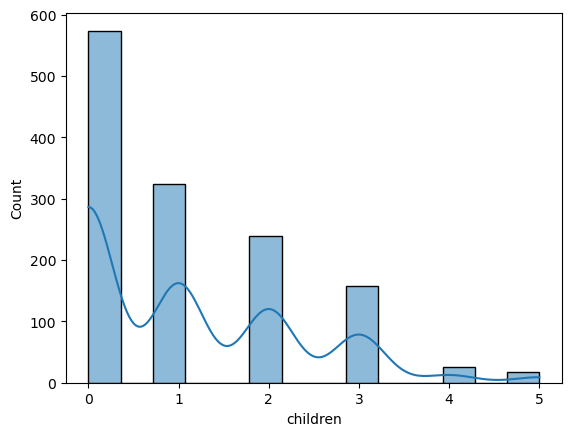

In [13]:
sns.histplot(data['children'], kde=True)
plt.show()

In [14]:
data['children'].skew()

0.9383804401702414

* since the childen column is moderately positively skewed and has slightly longer tails, we impute the missing values with median.

In [15]:
data['children'] = data['children'].fillna(data['children'].median())

In [16]:
data['children'].isna().sum()

0

In [17]:
## imputing missing values for numerical columns with median

data['age'] = data['age'].fillna(data['age'].median())
data['bmi'] = data['bmi'].fillna(data['bmi'].median())
data['charges in INR'] = data['charges in INR'].fillna(data['charges in INR'].median())

* since smoker,region,sex columns are categorical, we impute missing values with mode

In [18]:
data['smoker'] = data['smoker'].fillna(data['smoker'].mode()[0])

In [19]:
data['smoker'].isna().sum()

0

In [20]:
data['region'] = data['region'].fillna(data['region'].mode()[0])

In [21]:
data['region'].isna().sum()

0

In [22]:
data['sex'] = data['sex'].fillna(data['sex'].mode()[0])

In [23]:
data['sex'].isna().sum()

0

In [24]:
data.isna().sum()

Policy no.        0
children          0
smoker            0
region            0
age               0
sex               0
bmi               0
charges in INR    0
dtype: int64

In [25]:
data.describe()

,children,age,bmi,charges in INR
count,2676.000000,2676.000000,2676.000000,2676.000000
mean,1.047459,39.103513,30.531698,11326.227633
std,0.853574,9.933505,4.313275,8779.526196
min,0.000000,18.000000,15.960000,1121.873900
25%,1.000000,39.000000,30.400000,9381.000925
50%,1.000000,39.000000,30.400000,9382.033000
75%,1.000000,39.000000,30.400000,9383.065075
max,5.000000,64.000000,53.130000,63770.428010


### 1. Does the gender of the person matter for the company as a constraint for extending policies?

In [26]:
data['sex'].value_counts()

sex
male      2014
female     662
Name: count, dtype: int64

In [27]:
## avg charges by gender

data.groupby('sex')['charges in INR'].mean()

sex
female    12569.578844
male      10917.539201
Name: charges in INR, dtype: float64

<Axes: title={'center': 'Charges by gender'}, xlabel='sex', ylabel='charges in INR'>

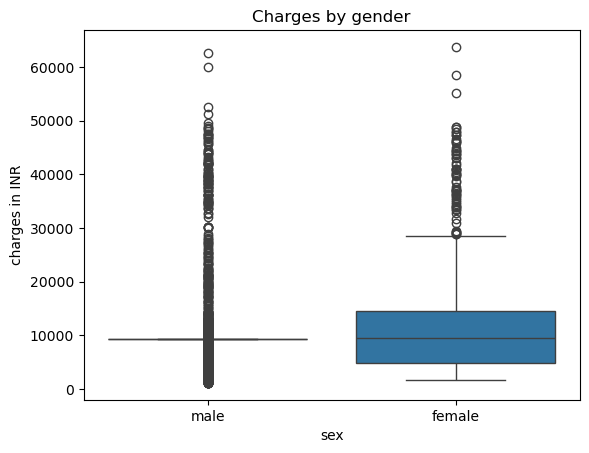

In [28]:
plt.title("Charges by gender")
sns.boxplot(x='sex',y='charges in INR',data=data)

<Axes: xlabel='sex', ylabel='charges in INR'>

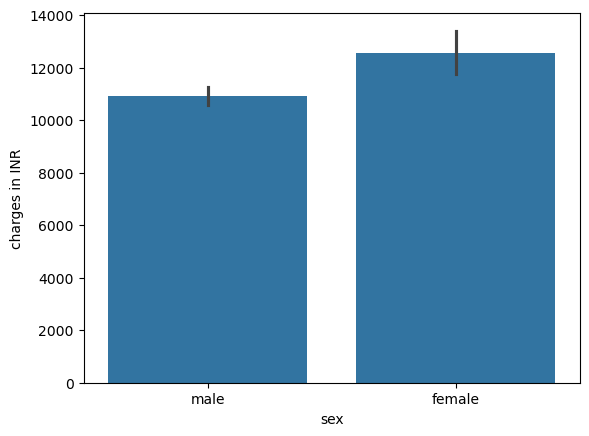

In [30]:
sns.barplot(x=data['sex'],y=data['charges in INR'])  

### Insights:

* The median for females is slightly higher than the males, which means the medical charges of women are slightly higher than the male(but the difference is not drastic)

* Female has to pay (around 12569) higher charges than male (around 10917).

* In clonclusion, gender might be a constraint for different policy structure 

### 2. What is the average amount of money the company spent over each policy cover?

In [31]:
data['charges in INR'].mean()

11326.227632570626

### Insights:
* On average, the company spends ₹11326.22 per insurance policy cover. This value represents the typical amount by the company per individual policy.

### 3. Could you advice if the company needs to offer separate policies based upon the geographic location of the person?

In [32]:
data['region'].value_counts()

region
southeast    1702
southwest     325
northwest     325
northeast     324
Name: count, dtype: int64

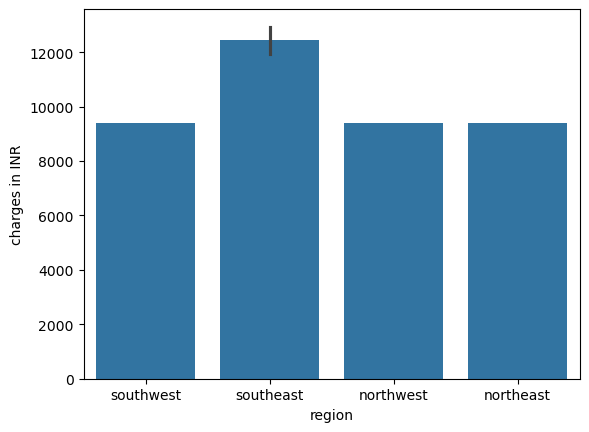

In [33]:
sns.barplot(x=data['region'],y=data['charges in INR'])
plt.show()

### Insights: 
* The southeast region has the highest insurance charges(may be due to lifestyle,high healthcare costs and high risk factors) whereas southwest, northwest and northeast regions have similar and significantly lower charges.

* In conclusion, the company should consider offering separate policies based on geographic location.

### 4. Does the no. of dependents make a difference in the amount claimed?

<Axes: xlabel='children', ylabel='charges in INR'>

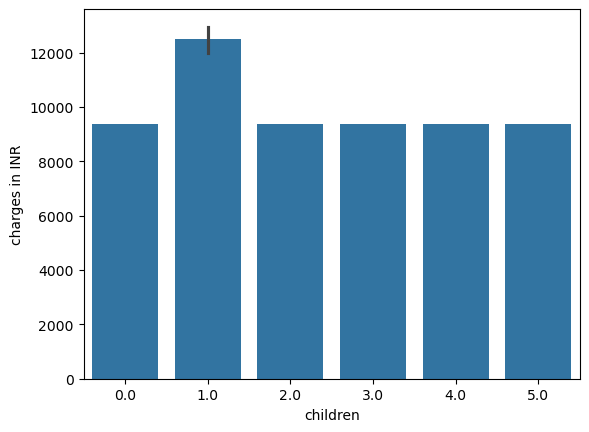

In [34]:
sns.barplot(x=data['children'],y=data['charges in INR'])

### Insights:
* Though the charges have increased when the no. of childer is 1 and after that it starts to fall.

* So there is no significant increase or decrease with more children ( except for a spike at 1 child)

### 5. Does a study of persons BMI get the company any idea for the insurance claim that it would extend?

In [35]:
correlation = data['bmi'].corr(data['charges in INR'])
print(correlation)

0.20008860184891045


### Insights:
* since correlation is <0.3, there is a moderate correlation b/w bmi and charges

<Axes: xlabel='bmi', ylabel='charges in INR'>

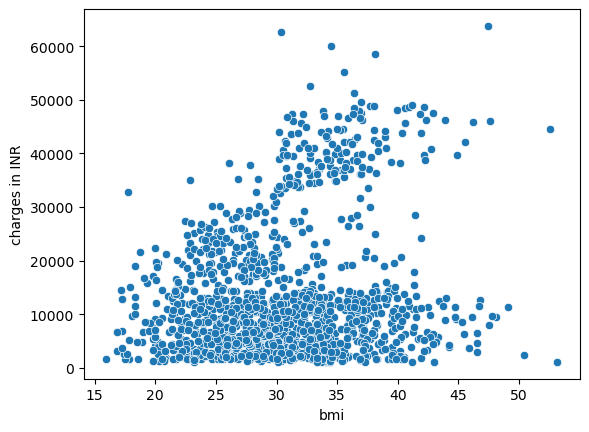

In [36]:
sns.scatterplot(x=data['bmi'],y=data['charges in INR'])

### Insights from scatterplot:
* As the bmi increases there is a significant increase the charges for some people.

* majority of the people claims lowerr range of charges irrespective of bmi.

* A cluster of high charges starts appearing especially above BMI ~30, which could indicate obesity-related health risks.

### 6. Is it needed for the company to understand whether the person covered is a smoker or a non-smoker?

In [37]:
data['smoker'].value_counts()

smoker
no     2402
yes     274
Name: count, dtype: int64

<Axes: xlabel='smoker', ylabel='charges in INR'>

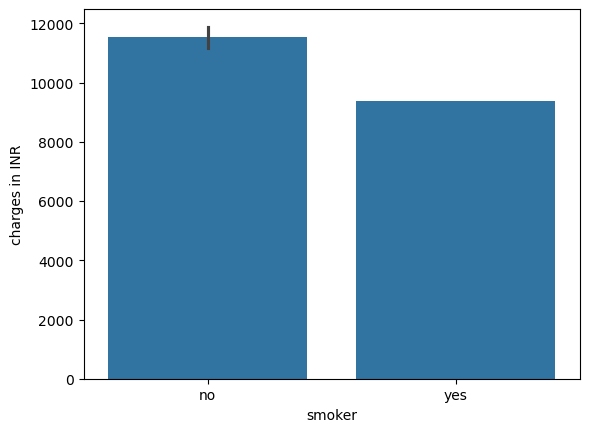

In [38]:
sns.barplot(x=data['smoker'],y=data['charges in INR'])

In [39]:
data.groupby('smoker')['charges in INR'].mean()

smoker
no     11548.005039
yes     9382.033000
Name: charges in INR, dtype: float64

### Insights:
* On an avg a smoker has to pay 9382.033 whereas a non-smoker has to pay 11548.005
* A person who is a non-smoker has the highest charges than the smoker

### 7. Does age have any barrier on the insurance claimed?

In [40]:
pd.DataFrame(data.groupby('age')['charges in INR'].mean())

,charges in INR
age,
18.0,7086.217556
19.0,9747.909335
20.0,10159.697736
21.0,4730.464330
22.0,10012.932802
23.0,12419.820040
24.0,10648.015962
25.0,9838.365311
26.0,6133.825309


In [41]:
data['age'].corr(data['charges in INR'])

0.29387439037076096

* There is a weak correlation b/w age and charges in INR

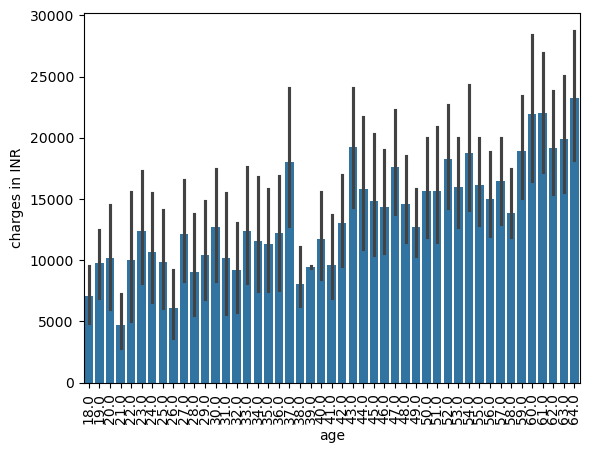

In [42]:
sns.barplot(x=data['age'],y=data['charges in INR'])
plt.xticks(rotation='vertical')
plt.show()

### Insights:
* There is no specific age where charges are increasing significantly, but after a period of time, charges are increased as age increases.

* In summary, there seems to be a trend indicating that age could impact insurance charges.

### 8. Can the company extend certain discounts after checking the health status (BMI) in this case?

<Axes: xlabel='bmi', ylabel='charges in INR'>

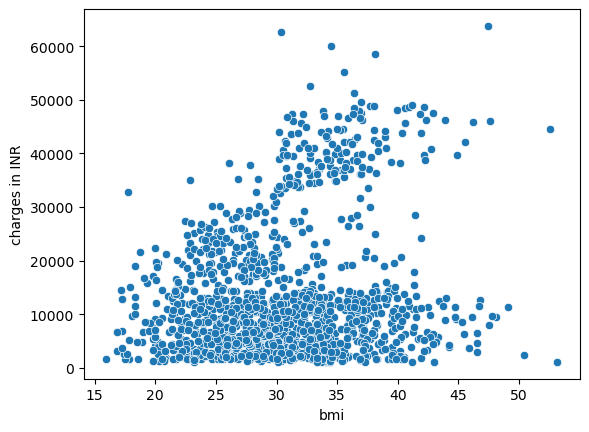

In [43]:
sns.scatterplot(data=data, x='bmi', y='charges in INR')

<Axes: xlabel='bmi_category', ylabel='charges in INR'>

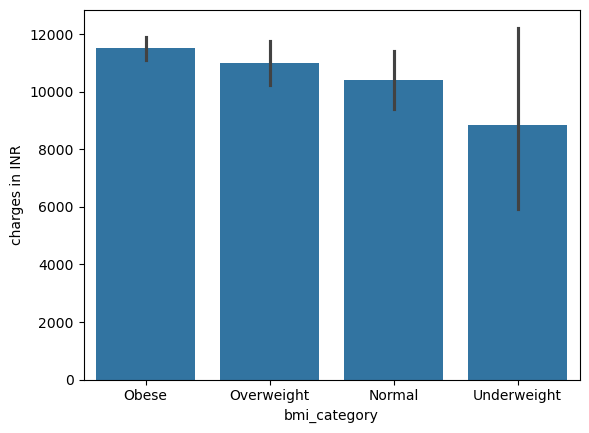

In [44]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

data['bmi_category'] = data['bmi'].apply(bmi_category)
sns.barplot(data=data, x='bmi_category', y='charges in INR')


### Insights:
* Obese individuals has higher charges, Overweight and Normal categories has slightly lower charges and Underweight individuals have the lowest average charges.

* Discounts should go to low-risk (Normal BMI) individuals as a reward, and behavior-based incentives can be offered to higher-risk groups (like Obese) to motivate improvement.

* This strategy encourages healthy behavior while keeping the insurance model financially sustainable.

## Preprocessing

In [45]:
data.head()

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR,bmi_category
0,PLC157006,0.0,no,southwest,39.0,male,30.4,9382.033,Obese
1,PLC157033,1.0,no,southwest,39.0,male,30.4,9382.033,Obese
2,PLC157060,0.0,no,southwest,39.0,male,30.4,9382.033,Obese
3,PLC157087,1.0,no,southwest,39.0,male,30.4,9382.033,Obese
4,PLC157186,5.0,no,southwest,39.0,male,30.4,9382.033,Obese


In [46]:
data.drop(['Policy no.','bmi_category'],axis=1,inplace=True)

In [47]:
data.duplicated().sum()

1296

In [48]:
data.drop_duplicates(inplace=True)

In [49]:
data.duplicated().sum()

0

In [50]:
data.isna().sum()

children          0
smoker            0
region            0
age               0
sex               0
bmi               0
charges in INR    0
dtype: int64

In [51]:
from sklearn.preprocessing import LabelEncoder

encode=LabelEncoder()

In [52]:
## encoding categorical features

data['sex'] = encode.fit_transform(data['sex'])
data['smoker'] = encode.fit_transform(data['smoker'])


* since label encoding might mislead sometimes, which can interpret higher numbers as higher magnitude, we use get_dummies since region has no specific order.

In [53]:
# Convert categorical variable into dummy/indicator variables
data = pd.get_dummies(data, columns=['region'])


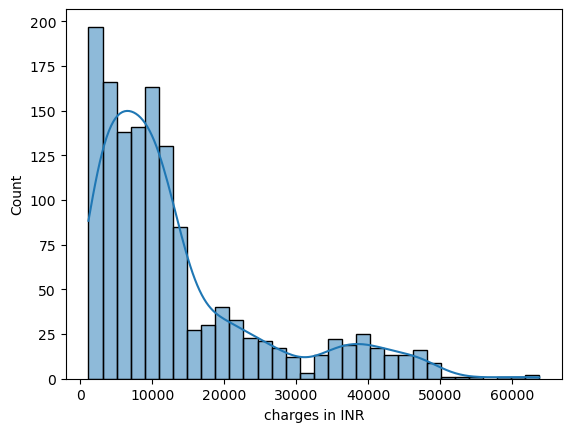

In [54]:
sns.histplot(data['charges in INR'], kde=True)
plt.show()

* since charges in INR column is highly skewed, we use log transformation to make it normally distributed.

<Axes: xlabel='charges_INR', ylabel='Count'>

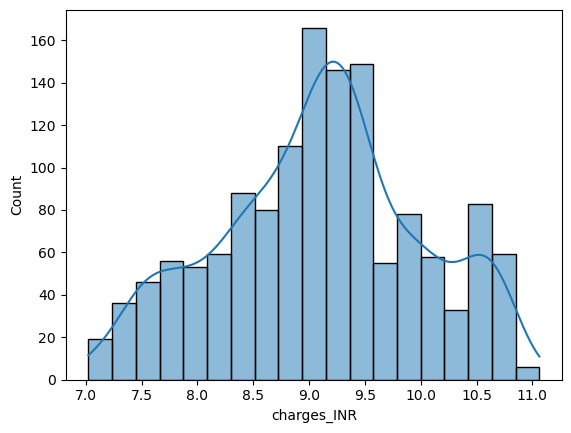

In [55]:
data['charges_INR'] = np.log1p(data['charges in INR'])
sns.histplot(data['charges_INR'], kde=True)

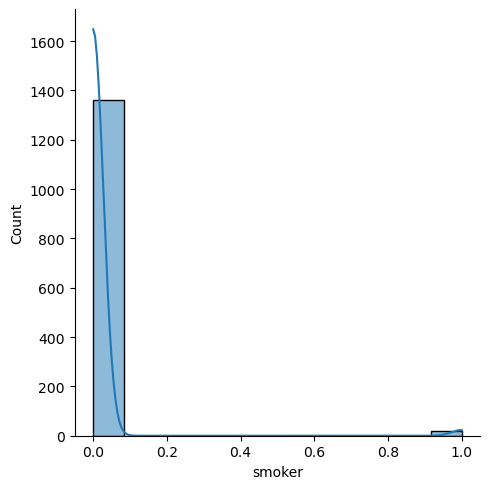

In [56]:
sns.displot(data['smoker'], kde=True)
plt.show()

In [57]:
data['smoker'].value_counts()

smoker
0    1361
1      19
Name: count, dtype: int64

* smoker column is highly imbalanced(regression models naturally handle imbalanced features as long as you feed them the data correctly)

<Axes: >

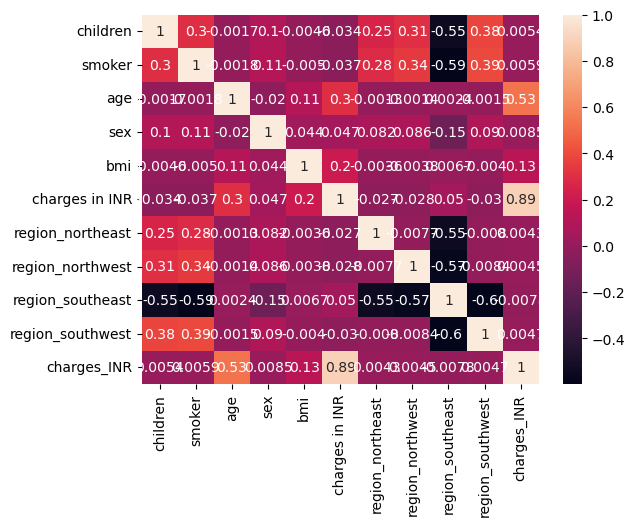

In [58]:
sns.heatmap(data.corr(),annot=True)

## Model Building

* our goal is to predict charges in INR based on independent features(children,smoker,region,age,sex,bmi)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

import numpy as np

In [60]:
X = data.drop('charges in INR',axis=1)
y = data['charges in INR']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42)
}

In [63]:
param_grid = {
    'Linear Regression': {},
    'Ridge': {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
    'Lasso': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]},
    'Decision Tree Regressor': {'max_depth': [3, 5, 10, None]},
    'Random Forest Regressor': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]},
    'Gradient Boosting Regressor': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]},
    'XGBoost Regressor': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
}

In [64]:
for name, model in models.items():
    print(f"\n----- {name} -----")
    
    grid = GridSearchCV(model, param_grid[name], cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    print(f"Best Params: {grid.best_params_}")
    print(f"R2 Score: {r2_score(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print('----------------------------------')


----- Linear Regression -----
Best Params: {}
R2 Score: 0.8412246014978977
MAE: 3412.004140567868
MSE: 22308567.578100875
RMSE: 4723.194636906346
----------------------------------

----- Ridge -----
Best Params: {'alpha': 1.0}
R2 Score: 0.8411085184712076
MAE: 3412.5931423397906
MSE: 22324877.69963115
RMSE: 4724.920919934127
----------------------------------

----- Lasso -----
Best Params: {'alpha': 10.0}
R2 Score: 0.8408755341277425
MAE: 3411.296444876402
MSE: 22357612.91566502
RMSE: 4728.3837530032415
----------------------------------

----- Decision Tree Regressor -----
Best Params: {'max_depth': 10}
R2 Score: 0.9993458546718891
MAE: 48.8129857429009
MSE: 91909.98980782344
RMSE: 303.1666040444156
----------------------------------

----- Random Forest Regressor -----
Best Params: {'max_depth': None, 'n_estimators': 50}
R2 Score: 0.999972052654595
MAE: 26.989011796376555
MSE: 3926.711880283982
RMSE: 62.66348123336256
----------------------------------

----- Gradient Boosting Reg

## Conclusion:
#### The best model came out to be Random Forest Regressor with low MAE,MSE,RMSE and high r2 scoere.